In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Importing Libraries

In [2]:
Pol_Train = pd.read_csv(r'C:\Users\shres\Desktop\Datasets\Polynomial_train.csv')
Pol_Test = pd.read_csv(r'C:\Users\shres\Desktop\Datasets\Polynomial_test.csv')
Train = Pol_Train.to_numpy()
Test = Pol_Test.to_numpy()
#Reading and Conversion of CSV File to NumPy Array

In [3]:
print(Train,"\n",Train.shape)

[[ 6.43715169e-01 -9.86655011e+00 -5.83601940e+00  3.07972927e+02]
 [-1.36644585e+00 -3.76194541e+00 -8.75616193e+00  1.36398375e+02]
 [-4.09026967e+00 -1.83621751e+00 -1.84606562e+00 -3.10724813e+02]
 ...
 [ 6.61675320e+00 -2.84728822e+00 -5.04040015e-01  6.63873656e+02]
 [ 3.55819907e+00  4.50752592e+00 -4.82367370e+00 -4.21004005e+02]
 [ 6.23430792e-01  8.86323404e+00 -3.23103970e+00 -6.99718682e+02]] 
 (50000, 4)


In [4]:
print(Test,"\n",Test.shape)

[[ 9.32207776e+00  4.13096456e-01  5.98473071e+00 -6.57669310e+02]
 [ 2.81196379e+00  6.14275187e+00  6.41923693e+00 -5.45362524e+02]
 [-2.66978441e+00  7.77509088e+00 -6.93190696e+00 -7.50441866e+01]
 ...
 [ 6.64099656e+00  6.86487708e+00  4.51168542e+00 -1.77164069e+03]
 [-6.26241442e+00  1.32320320e+00 -3.91774828e+00 -2.27469212e+01]
 [ 8.28979179e+00 -3.71540510e-01  2.09903937e+00 -6.48534458e+01]] 
 (10000, 4)


In [8]:
X = Train[:,:3]
X_Test1 = Test[:,:3]
print(X,"\n",X.shape,"\n",X_Test1,"\n",X_Test1.shape)
#Extracting Training and Testing Input

[[ 0.64371517 -9.86655011 -5.8360194 ]
 [-1.36644585 -3.76194541 -8.75616193]
 [-4.09026967 -1.83621751 -1.84606562]
 ...
 [ 6.6167532  -2.84728822 -0.50404001]
 [ 3.55819907  4.50752592 -4.8236737 ]
 [ 0.62343079  8.86323404 -3.2310397 ]] 
 (50000, 3) 
 [[ 9.32207776  0.41309646  5.98473071]
 [ 2.81196379  6.14275187  6.41923693]
 [-2.66978441  7.77509088 -6.93190696]
 ...
 [ 6.64099656  6.86487708  4.51168542]
 [-6.26241442  1.3232032  -3.91774828]
 [ 8.28979179 -0.37154051  2.09903937]] 
 (10000, 3)


In [9]:
Y = np.vstack(Train[:,3])
Y_True = np.vstack(Test[:,3])
print(Y, "\n",Y.shape,"\n",Y_True,"\n",Y_True.shape)
#Extracting Training and Testing Output

[[ 307.9729269]
 [ 136.3983754]
 [-310.7248135]
 ...
 [ 663.8736555]
 [-421.0040045]
 [-699.7186817]] 
 (50000, 1) 
 [[ -657.6693095 ]
 [ -545.3625239 ]
 [  -75.04418664]
 ...
 [-1771.640694  ]
 [  -22.74692118]
 [  -64.85344575]] 
 (10000, 1)


In [10]:
def normalisation(A):    #Normalisation Function : Since data is varied and not close to each other
    A_Mean = A.mean(axis=0)
    Range = A.max(axis=0)-A.min(axis=0)
    A_Scaled = (A-A_Mean)/Range
    return A_Scaled

In [21]:
A = np.vstack(X[:,0])
B = np.vstack(X[:,1])
C = np.vstack(X[:,2])
#Extracting Unique Columns of Training Matrix and Vectorizing Them

In [22]:
print(A,B,C)

[[ 0.64371517]
 [-1.36644585]
 [-4.09026967]
 ...
 [ 6.6167532 ]
 [ 3.55819907]
 [ 0.62343079]] [[-9.86655011]
 [-3.76194541]
 [-1.83621751]
 ...
 [-2.84728822]
 [ 4.50752592]
 [ 8.86323404]] [[-5.8360194 ]
 [-8.75616193]
 [-1.84606562]
 ...
 [-0.50404001]
 [-4.8236737 ]
 [-3.2310397 ]]


In [13]:
def degree2(A,B):   #Degree 2 Terms Evaluation
    R = A*B
    return R
def degree3(A,B,C): #Degree 3 Terms Evaluation
    R = A*B*C
    return R

In [14]:
D21=degree2(A,A)
D22=degree2(B,B)
D23=degree2(C,C)
D24=degree2(A,B)
D25=degree2(B,C)
D26=degree2(C,A)

In [15]:
D31=degree3(A,A,A)
D32=degree3(B,B,B)
D33=degree3(C,C,C)
D34=degree3(A,A,B)
D35=degree3(A,A,C)
D36=degree3(B,B,A)
D37=degree3(B,B,C)
D38=degree3(C,C,A)
D39=degree3(C,C,B)
D310=degree3(A,B,C)

In [17]:
X2 = np.concatenate((X,D21,D22,D23,D24,D25,D26),axis=1)
#Adding the new parameters of degree 2 in the Training Matrix

In [18]:
X3 = np.concatenate((X2,D31,D32,D33,D34,D35,D36,D37,D38,D39,D310),axis=1) 
 #Adding the new parameters of degree 3 in the Training Matrix

In [19]:
print(X,"\n",X.shape,"\n",X2,"\n",X2.shape,"\n",X3,"\n",X3.shape)

[[ 0.64371517 -9.86655011 -5.8360194 ]
 [-1.36644585 -3.76194541 -8.75616193]
 [-4.09026967 -1.83621751 -1.84606562]
 ...
 [ 6.6167532  -2.84728822 -0.50404001]
 [ 3.55819907  4.50752592 -4.8236737 ]
 [ 0.62343079  8.86323404 -3.2310397 ]] 
 (50000, 3) 
 [[  0.64371517  -9.86655011  -5.8360194  ...  -6.35124797  57.58137788
   -3.75673422]
 [ -1.36644585  -3.76194541  -8.75616193 ...   5.14049469  32.94020319
   11.96482113]
 [ -4.09026967  -1.83621751  -1.84606562 ...   7.51062479   3.38977801
    7.55090619]
 ...
 [  6.6167532   -2.84728822  -0.50404001 ... -18.83980346   1.4351472
   -3.33510838]
 [  3.55819907   4.50752592  -4.8236737  ...  16.03867453 -21.74283426
  -17.16359126]
 [  0.62343079   8.86323404  -3.2310397  ...   5.52561302 -28.63746107
   -2.01432964]] 
 (50000, 9) 
 [[   0.64371517   -9.86655011   -5.8360194  ...   21.92437377
  -336.04603849   37.06600639]
 [  -1.36644585   -3.76194541   -8.75616193 ... -104.76591131
  -288.42975325  -45.01100391]
 [  -4.09026967  

In [20]:
P = np.vstack(X_Test1[:,0])
Q = np.vstack(X_Test1[:,1])
R = np.vstack(X_Test1[:,2])
#Extracting Unique Columns of Testing Matrix and Vectorizing Them

In [23]:
E21=degree2(P,P)
E22=degree2(Q,Q)
E23=degree2(R,R)
E24=degree2(P,Q)
E25=degree2(Q,R)
E26=degree2(R,P)

In [24]:
E31=degree3(P,P,P)
E32=degree3(Q,Q,Q)
E33=degree3(R,R,R)
E34=degree3(P,P,Q)
E35=degree3(P,P,R)
E36=degree3(Q,Q,P)
E37=degree3(Q,Q,R)
E38=degree3(R,R,P)
E39=degree3(R,R,Q)
E310=degree3(P,Q,R)

In [25]:
X_Test2 = np.concatenate((X_Test1,E21,E22,E23,E24,E25,E26),axis=1)
#Adding the new parameters of degree 2 in the Testing Matrix

In [29]:
X_Test3 = np.concatenate((X_Test2,E31,E32,E33,E34,E35,E36,E37,E38,E39,E310),axis=1)
#Adding the new parameters of degree 3 in the Testing Matrix

In [30]:
print(X_Test1,"\n",X_Test1.shape,"\n",X_Test2,"\n",X_Test2.shape,"\n",X_Test3,"\n",X_Test3.shape)

[[ 9.32207776  0.41309646  5.98473071]
 [ 2.81196379  6.14275187  6.41923693]
 [-2.66978441  7.77509088 -6.93190696]
 ...
 [ 6.64099656  6.86487708  4.51168542]
 [-6.26241442  1.3232032  -3.91774828]
 [ 8.28979179 -0.37154051  2.09903937]] 
 (10000, 3) 
 [[  9.32207776   0.41309646   5.98473071 ...   3.85091729   2.47227105
   55.79012505]
 [  2.81196379   6.14275187   6.41923693 ...  17.2731958   39.43177969
   18.05066179]
 [ -2.66978441   7.77509088  -6.93190696 ... -20.75781641 -53.89620658
   18.50669711]
 ...
 [  6.64099656   6.86487708   4.51168542 ...  45.58962507  30.97216585
   29.96208736]
 [ -6.26241442   1.3232032   -3.91774828 ...  -8.2864468   -5.18397707
   24.53456333]
 [  8.28979179  -0.37154051   2.09903937 ...  -3.07999347  -0.77987816
   17.40059936]] 
 (10000, 9) 
 [[ 9.32207776e+00  4.13096456e-01  5.98473071e+00 ...  3.33888875e+02
   1.47958764e+01  2.30467029e+01]
 [ 2.81196379e+00  6.14275187e+00  6.41923693e+00 ...  1.15871475e+02
   2.53121937e+02  1.108807

In [31]:
X_1 = normalisation(X)
X_2 = normalisation(X2)
X_3 = normalisation(X3)
X_T_1 = normalisation(X_Test1)
X_T_2 = normalisation(X_Test2)
X_T_3 = normalisation(X_Test3)

In [34]:
X0 = np.vstack(np.ones(X.shape[0]))
#Creating Bias Vector

In [36]:
X_D1 = np.append(X0,X_1,axis=1)
X_D2 = np.append(X0,X_2,axis=1)
X_D3 = np.append(X0,X_3,axis=1)
print(X_D1,"\n",X_D1.shape,"\n",X_D2,"\n",X_D2.shape,"\n",X_D3,"\n",X_D3.shape)
#Adding the bias in normalized Testing Matrix

[[ 1.          0.01328649 -0.44551069 -0.29151393]
 [ 1.         -0.03049626 -0.16883663 -0.43708175]
 [ 1.         -0.08982311 -0.08155842 -0.09261648]
 ...
 [ 1.          0.14338356 -0.12738236 -0.02571709]
 [ 1.          0.07676605  0.20595394 -0.24104894]
 [ 1.          0.01284468  0.40336418 -0.16165683]] 
 (50000, 4) 
 [[ 1.          0.01328649 -0.44551069 ... -0.01925251  0.28916446
  -0.0116581 ]
 [ 1.         -0.03049626 -0.16883663 ...  0.0177072   0.16521831
   0.03839036]
 [ 1.         -0.08982311 -0.08155842 ...  0.02533     0.01657841
   0.02433897]
 ...
 [ 1.          0.14338356 -0.12738236 ... -0.05941817  0.00674654
  -0.01031589]
 [ 1.          0.07676605  0.20595394 ...  0.05275789 -0.10983969
  -0.05433789]
 [ 1.          0.01284468  0.40336418 ...  0.01894581 -0.14451996
  -0.00611128]] 
 (50000, 10) 
 [[ 1.00000000e+00  1.32864914e-02 -4.45510694e-01 ...  8.84182565e-03
  -1.69197480e-01  1.76114035e-02]
 [ 1.00000000e+00 -3.04962633e-02 -1.68836629e-01 ... -4.672

In [37]:
XT = np.vstack(np.ones(X_Test2.shape[0]))

In [38]:
X_T1 = np.append(XT,X_T_1,axis=1)
X_T2 = np.append(XT,X_T_2,axis=1)
X_T3 = np.append(XT,X_T_3,axis=1)
print(X_T1,"\n",X_T1.shape,"\n",X_T2,"\n",X_T2.shape,"\n",X_T3,"\n",X_T3.shape)
#Adding the bias in normalized Testing Matrix

[[ 1.          0.46246228  0.01651602  0.29926494]
 [ 1.          0.13694642  0.30308512  0.32099505]
 [ 1.         -0.13714954  0.38472666 -0.34670937]
 ...
 [ 1.          0.32840404  0.33920226  0.22559644]
 [ 1.         -0.31678665  0.06203507 -0.1959682 ]
 [ 1.          0.41084637 -0.02272765  0.10493753]] 
 (10000, 4) 
 [[ 1.          0.46246228  0.01651602 ...  0.02311571  0.01198382
   0.28457565]
 [ 1.          0.13694642  0.30308512 ...  0.0916272   0.20098783
   0.09188465]
 [ 1.         -0.13714954  0.38472666 ... -0.10249493 -0.27627404
   0.09421309]
 ...
 [ 1.          0.32840404  0.33920226 ...  0.23616308  0.15772695
   0.15270228]
 [ 1.         -0.31678665  0.06203507 ... -0.03883717 -0.0271688
   0.1249903 ]
 [ 1.          0.41084637 -0.02272765 ... -0.01226181 -0.00464707
   0.08856555]] 
 (10000, 10) 
 [[ 1.          0.46246228  0.01651602 ...  0.17034113  0.00714614
   0.01370846]
 [ 1.          0.13694642  0.30308512 ...  0.05848526  0.12834893
   0.06173161]
 [ 1

In [39]:
def polynomial_regression(iterations, learning_rate, X, Y, X_Test): #Polynomial Regression Function
  theta = np.vstack(np.zeros(X.shape[1])) #Initializing Parameters
  m = len(X)
  for p in range(iterations) :
    hyp = np.dot(X,theta) #Hypothesis 
    cost = (np.sum((hyp-Y)**2))/(2*m) #Cost Function
    grad = np.dot(X.T,(hyp-Y)) #Gradient
    theta = theta - np.dot((learning_rate/m), grad) #Parameter Simultaneous Updation
    plt.scatter(p,cost) #Plotting Gradient Descent
  Y_Test = np.dot(X_Test,theta)
  print(cost)
  return Y_Test

In [71]:
def MSE(A,B):
    M = A.shape[0]
    Diff = (A-B)**2
    R = (np.sum(Diff))/(2*M)
    return R

62.340740826528695


array([[ -505.5747523 ],
       [-1330.41389532],
       [ -221.99586193],
       ...,
       [-2786.79053583],
       [   27.13760484],
       [  330.56250822]])

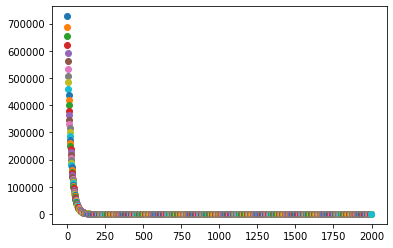

In [59]:
Y_P3 = polynomial_regression(2000, 1.99, X_D3, Y, X_T3)
Y_P3 #Predicting output(scaled) for X_Test
#Diverges at 2, optimum between 1.99 and 2

In [70]:
Y_True

array([[ -657.6693095 ],
       [ -545.3625239 ],
       [  -75.04418664],
       ...,
       [-1771.640694  ],
       [  -22.74692118],
       [  -64.85344575]])

In [72]:
MSE(Y_P3,Y_True)

301675.1939167583

71.69530953845312


array([[ -549.17496032],
       [-1331.76661255],
       [ -222.49263892],
       ...,
       [-2809.83163912],
       [   39.43373336],
       [  294.2668821 ]])

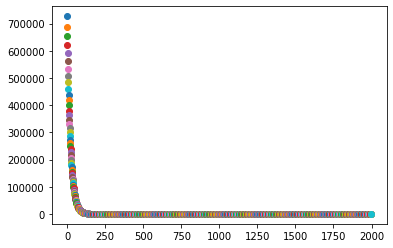

In [68]:
Y_P2 = polynomial_regression(2000,1.99,X_D2,Y,X_T2)
Y_P2

In [73]:
MSE(Y_P2,Y_True)

301882.2807949841